In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in dataset
df = pd.read_csv('data/reduced_qi_filled.csv')

## Assignment: 
Assuming that each field other than the user-id and the course name is a quasi-identifier, determine the level of k-anonymity in the file. Then, make the file 5-anonymous using only record suppression; how many records need to be deleted to do this? Try making the file 5-anonymous using only column suppression; how many columns need to be deleted to do this, and which ones are they? Finally, try to produce a 5-anonymous data set using generalization. Finally, see if you can use some combination of these mechanisms to produce a 5-anonymous data set.

## Step 0: Explore the data

In [24]:
print('Number of attributes:',len(df.columns))
print('Number of records:',len(df))

Number of attributes: 15
Number of records: 199999


In [25]:
#df.head()

,course_id,user_id,cc_by_ip,city,postalCode,LoE,YoB,gender,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events
0,HarvardX/PH525.1x/1T2018,29940,US,Austin,78713,NaN,NaN,NaN,0,0,0,0,0,0,0
1,HarvardX/PH525.1x/1T2018,37095,BD,Dhaka,NaN,b,1991.0,m,0,0,0,0,0,0,0
2,HarvardX/PH525.1x/1T2018,45634,CO,Medellín,NaN,m,1982.0,m,0,0,0,0,0,0,0
3,HarvardX/PH525.1x/1T2018,52234,SE,Skanör,NaN,p,1988.0,m,0,0,0,0,0,0,0
4,HarvardX/PH525.1x/1T2018,52238,MX,León,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


## Step 1: Remove identifiers (user_id and course_id)
This leaves only quasi-identifiers.

In [26]:
df_quasi = df.drop(columns=['user_id','course_id'])

In [27]:
#df_quasi.head()

,cc_by_ip,city,postalCode,LoE,YoB,gender,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events
0,US,Austin,78713,NaN,NaN,NaN,0,0,0,0,0,0,0
1,BD,Dhaka,NaN,b,1991.0,m,0,0,0,0,0,0,0
2,CO,Medellín,NaN,m,1982.0,m,0,0,0,0,0,0,0
3,SE,Skanör,NaN,p,1988.0,m,0,0,0,0,0,0,0
4,MX,León,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


## Step 2: Determine current k-level of anonymity

In [28]:
# Sanity check for k-anonymity
print('Number of unique rows:',len(df_quasi.drop_duplicates()))

Number of unique rows: 132343


In [51]:
# For each unique row, get counts (the count of each row tells us how k-anonymous each row is)
# and move to front of df for debugging
df_counts = df_quasi.groupby(list(df_quasi.columns), dropna=False).size().to_frame('counts').reset_index()
cols = list(df_counts.columns)
df_counts = df_counts[[cols[-1]] + cols[:-1]]

print('Number of unique rows:',len(df_counts))

Number of unique rows: 132343


In [52]:
#df_counts.head()

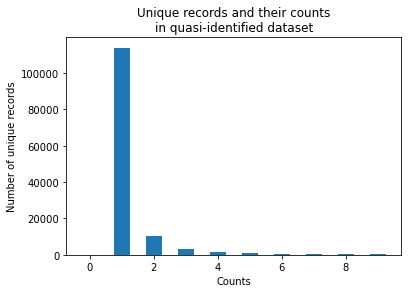

In [69]:
# Plot unique records and their counts
plt.hist(df_counts[['counts']],range=(0,10),bins=10,rwidth=0.5,align='left')
plt.title('Unique records and their counts\nin quasi-identified dataset')
plt.xlabel('Counts')
plt.ylabel('Number of unique records')
plt.show()

In [113]:
# Get more details
freq = df_counts[['counts']].value_counts().sort_index()
freq_dict = dict(zip(freq.index, freq.values))
for i in range(1,10):
    print(freq_dict[(i,)],'record(s) are',freq_dict[(i,)],'anonymous')

113906 record(s) are 113906 anonymous
10397 record(s) are 10397 anonymous
3238 record(s) are 3238 anonymous
1468 record(s) are 1468 anonymous
845 record(s) are 845 anonymous
519 record(s) are 519 anonymous
380 record(s) are 380 anonymous
267 record(s) are 267 anonymous
180 record(s) are 180 anonymous


It appears that the dataset is currently 1-anonymous (so not anonomys at all), since most records have a count of 1--meaning that they are unique.

## Step 3: Make dataset 5-anonymous with suppression

First, I try to do this logically. I need to remove records that are 1-, 2-, 3-, and 4-anonymous. From before, I calculated these counts. I can find the sum and then approach it another way to sanity check.

In [117]:
suppress_num = 0
for i in range(1,5):
    suppress_num+=freq_dict[(i,)]
print('Records to suppress:',suppress_num)
print('Percent of records to suppress:',round(suppress_num/len(df)*100),'%')

Records to suppress: 129009
Percent of records to suppress: 65 %
